# Healthcare Diabetes Classifier Project (Logistic_Regression)
## 당뇨병 진단 예측
- 당뇨병이 양성인지 음성인지 예측

#### feature (22개)
- Id: 각 데이터 항목의 고유 식별자
- Pregnancies: 임신 횟수
- Glucose: 경구 포도당 내성 테스트에서 2시간 동안의 혈장 포도당 농도
- BloodPressure: 확장기 혈압(mmHg)
- SkinThickness: 삼두근 피부주름 두께(mm)
- Insulin: 2시간 혈청 인슐린(mu U/ml)
- BMI: 체질량 지수(체중(kg) / 키(m^2))
- DiabetesPedigreeFunction: 당뇨병의 유전적 점수인 당뇨병 혈통 기능
- Age: 나이(년)


#### target
- Outcome: 당뇨병의 존재(1) 또는 부재(0)를 나타내는 이진 분류

In [1]:
import pandas as pd

# 데이터 세트 호출
h_df = pd.read_csv('./datasets/Healthcare_Diabetes.csv', low_memory=False)
h_df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


#### 📊 데이터 탐색

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

### 🌟 1Cycle

#### 📊 전처리

In [3]:
# 불필요한 데이터 세트 제거 (id 컬럼)
pre_h_df = h_df.drop(labels='Id', axis=1)

In [4]:
# 언더 샘플링
Outcome0 = pre_h_df[pre_h_df.Outcome == 0].sample(952, random_state=124)
Outcome1 = pre_h_df[pre_h_df.Outcome == 1]
pre_h_df = pd.concat([Outcome0, Outcome1]).reset_index(drop=True)

#### 🚩 1Cycle 결과
- Logistic Regression  
**정확도: 0.7349, 정밀도: 0.7380, 재현율: 0.7263, F1:0.7321, AUC:0.7349**

---

### 🌟 2Cycle

In [5]:
# 수치형 데이터 이상치 제거
from sklearn.preprocessing import StandardScaler

std_pre_h_df = pre_h_df.copy()
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']

for column in columns:
    # 표준화 객체 생성
    std = StandardScaler()
    # 데이터 표준화 변환
    result = std.fit_transform(pre_h_df[[column]])
    # 표준화 데이터 프레임 생성
    std_pre_h_df[column] = result

for column in columns:
    # 타겟 데이터 이상치 제거
    std_pre_h_df = std_pre_h_df[std_pre_h_df[column].between(-1.96, 1.96)]

# 이상치 제거 후 유지되는 인덱스를 대조하여 원본 데이터 이상치 제거
pre_h_df = pre_h_df.iloc[std_pre_h_df.index].reset_index(drop=True)

#### 🚩 1Cycle 결과
- Logistic Regression  
**정확도: 0.7349, 정밀도: 0.7380, 재현율: 0.7263, F1:0.7321, AUC:0.7349**

#### 🚩 2Cycle 결과
- 전처리 후 Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 💡 분석
- 이상치 제거 후 성능이 향상된 것을 확인함.
- 최소-최대 스케일링(min-max scaling)을 통해 값을 정규화하여 성능 차이를 비교하기로 함.

---

### 🌟 3Cycle

#### 🚩 2Cycle 결과
- Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 🚩 3Cycle 결과
- Min-Max Scaling  
**정확도: 0.7722, 정밀도: 0.7569, 재현율: 0.7466, F1:0.7517, AUC:0.7703**

#### 💡 분석
- Min-Max Scaling 시 이전 보다 성능이 저하됨에 따라 해당 전처리를 진행하지 않기로 함.
- 피처 이상치 제거 후 성능 평가를 진행하기로 함.

---

### 🌟 4Cycle

#### 🚩 2Cycle 결과
- Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 🚩 4Cycle 결과
- 피처 이상치 제거  
**정확도: 0.7716, 정밀도: 0.7474, 재현율: 0.7100, F1:0.7282, AUC:0.7641**

#### 💡 분석
- 피처 이상치 제거 시 이전 보다 성능이 저하됨에 따라 해당 전처리를 진행하지 않기로 함.
- 0과 같은 특정 데이터가 높게 나타나는 SkinThickness, lnsulin의 일부 데이터의 전처리를 진행하고자 함.

---

### 🌟 5Cycle

#### 🚩 2Cycle 결과
- Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 🚩 4Cycle 결과
- 피처 이상치 제거  
**정확도: 0.7716, 정밀도: 0.7474, 재현율: 0.7100, F1:0.7282, AUC:0.7641**

#### 🚩 5Cycle 결과
- 특정 피처 이상치 제거  
**정확도: 0.7917, 정밀도: 0.8000, 재현율: 0.6087, F1:0.6914, AUC:0.7571**

#### 💡 분석
- 특정 피처 이상치 제거 시 오히려 성능이 저하되는 것을 확인함.
- 해당 전처리는 진행하지 않는 것으로 하며, 분포 변환을 별도로 진행하기로 함.

---

### 🌟 6Cycle

#### 🚩 2Cycle 결과
- Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 🚩 6Cycle 결과
- 분포 변환 
**정확도: 0.7880, 정밀도: 0.7801, 재현율: 0.7534, F1:0.7666, AUC:0.7855**

#### 💡 분석
- 분포 변환 후 성능이 근소하게 하락함에 따라 해당 전처리를 진행하지 않는 것으로 함.
- 차원축소를 진행하여 성능 평가를 진행 함.

---

### 🌟 7Cycle

In [6]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

#### 📊 PCA

In [7]:
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

# 문제/정답 및 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [8]:
# 학습 및 테스트 데이터로 병합
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [9]:
from sklearn.decomposition import PCA

# 차원 축소 객체 생성
# n_components: 얼마나 차원축소할 건지 작성
pca = PCA(n_components=5)

# 타겟을 제외하고 피처만 차원 축소
pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])

# 크기 확인
print(pca_train.shape, pca_test.shape)

(1263, 5) (316, 5)


In [10]:
# train
# 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]

# 타겟 데이터 추가
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)

# 타겟 데이터 추가
pca_train_df.loc[:, 'target'] = train_df['Outcome']

# test
# 컬럼명 설정
pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]

# 차원 축소 데이터 프레임 생성
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
# 타겟 데이터 추가
pca_test_df.loc[:, 'target'] = test_df['Outcome']

In [11]:
display(pca_train_df)
display(pca_test_df)

,pca1,pca2,pca3,pca4,pca5,target
0,55.367170,23.320317,-20.819477,-7.653430,-5.781453,0
1,-88.630326,-4.444429,-3.901009,-15.991640,-1.252594,0
2,-44.727357,-13.443019,-7.741864,-17.830811,5.340526,0
3,-91.319040,-10.303710,14.138068,12.178894,-8.391967,1
4,-91.307369,-27.474603,1.585761,-5.683684,-5.621472,0
...,...,...,...,...,...,...
1258,88.464369,-33.283110,1.978409,21.143644,-1.580171,1
1259,-55.109533,-40.843238,-4.831819,3.035798,-11.427238,0
1260,-87.416464,31.274847,10.342059,9.364197,0.116063,0
1261,-85.748757,25.079296,-21.131223,6.574459,-0.292893,0


,pca1,pca2,pca3,pca4,pca5,target
0,-88.101846,6.014060,16.760554,-1.314569,-2.711969,0
1,-86.540461,26.430313,19.487239,12.094543,-10.989539,1
2,46.214768,16.711335,-17.279648,18.686279,2.241926,1
3,-86.056823,-4.523711,-21.111493,7.195514,15.425846,1
4,197.207356,-26.701414,1.574552,7.832474,-10.164084,0
...,...,...,...,...,...,...
311,-88.448574,7.895469,26.998857,12.504435,14.540505,0
312,-90.429036,-25.868467,14.724093,-1.454482,-13.893014,0
313,-89.195868,-21.904477,-1.857595,-17.134499,-0.905014,0
314,-5.482825,-27.937323,-9.361658,-6.524917,10.586512,0


In [12]:
# 보존률 확인
# 각각의 피처가 얼만큼 설명하고 있는지
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.91188617 0.05657952 0.01280725 0.01057076 0.00575957]
0.9976032716906176


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]

# 테스트 데이터 세트 분리
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.iloc[:, -1]

# 객체 생성
lg = LogisticRegression(solver='liblinear', penalty='l2', random_state=124)

# 훈련
lg.fit(features, targets)

# 예측
prediction = lg.predict(X_test)

오차 행렬
[[137  33]
 [ 49  97]]
정확도: 0.7405, 정밀도: 0.7462, 재현율: 0.6644, F1:0.7029, AUC:0.7351
###########################################################################


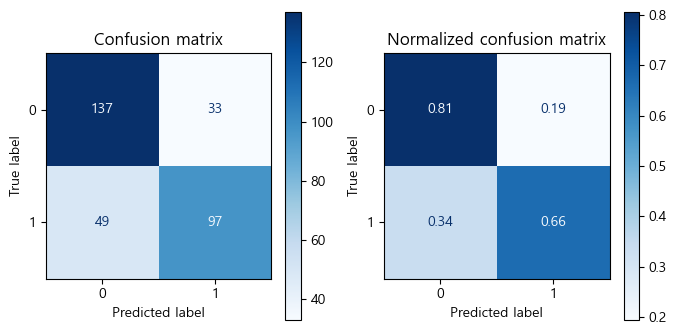

In [14]:
get_evaluation(y_test, prediction, lg, X_test)

---

### 🌟 8Cycle

#### 📊 LDA

In [15]:
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

# 문제/정답 및 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [16]:
# 학습 및 테스트 데이터로 병합
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 차원 축소 객체 생성
# n_components: 얼마나 차원축소할 건지 작성
lda = LinearDiscriminantAnalysis(n_components=1)

# 타겟을 제외하고 피처만 차원 축소
lda_train = lda.fit_transform(train_df.iloc[:, :-1], train_df.iloc[:, -1])
lda_test = lda.fit_transform(test_df.iloc[:, :-1], test_df.iloc[:, -1])

# 크기 확인
print(lda_train.shape, lda_test.shape)

(1263, 1) (316, 1)


In [18]:
# train
# 컬럼명 설정
lda_columns = [f'lda{i + 1}' for i in range(lda_train.shape[1])]

# 차원 축소 데이터 프레임 생성
lda_train_df = pd.DataFrame(lda_train, columns=lda_columns)
# 타겟 데이터 추가
lda_train_df.loc[:, 'target'] = train_df['Outcome']

# test
# 컬럼명 설정
lda_columns = [f'lda{i + 1}' for i in range(lda_test.shape[1])]

# 차원 축소 데이터 프레임 생성
lda_test_df = pd.DataFrame(lda_test, columns=lda_columns)
# 타겟 데이터 추가
lda_test_df.loc[:, 'target'] = test_df['Outcome']

In [19]:
display(lda_train_df)
display(lda_test_df)

,lda1,target
0,-1.866021,0
1,0.766878,0
2,0.921528,0
3,0.720879,1
4,2.074804,0
...,...,...
1258,1.086388,1
1259,2.153170,0
1260,-1.577995,0
1261,-1.342898,0


,lda1,target
0,-0.692390,0
1,1.560077,1
2,1.724983,1
3,-0.033747,1
4,-0.781045,0
...,...,...
311,0.569121,0
312,-1.285530,0
313,-1.475656,0
314,-0.614180,0


In [20]:
# 보존률 확인
# 각각의 피처가 얼만큼 설명하고 있는지
print(lda.explained_variance_ratio_)
print(lda.explained_variance_ratio_.sum())

[1.]
1.0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = lda_train_df.iloc[:, :-1], lda_train_df.iloc[:, -1]

# 테스트 데이터 세트 분리
X_test, y_test = lda_test_df.iloc[:, :-1], lda_test_df.iloc[:, -1]

# 객체 생성
lg = LogisticRegression(solver='liblinear', penalty='l2', random_state=124)

# 훈련
lg.fit(features, targets)

# 예측
prediction = lg.predict(X_test)

오차 행렬
[[ 44 126]
 [121  25]]
정확도: 0.2184, 정밀도: 0.1656, 재현율: 0.1712, F1:0.1684, AUC:0.2150
###########################################################################


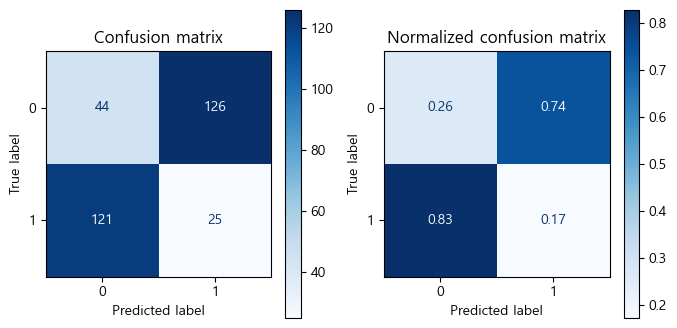

In [22]:
get_evaluation(y_test, prediction, lg, X_test)

In [23]:
data = {
    'model': ['2Cycle', '7Cycle', '8Cycle'],
    '정확도': [0.7911, 0.7405, 0.2184],
    '정밀도': [0.7817, 0.7462, 0.1656],
    '재현율': [0.7603, 0.6644, 0.1712],
    'F1': [0.7708, 0.7029, 0.1684],
    'AUC': [0.7890, 0.7351, 0.2150]
}

Cycle7_8 = pd.DataFrame(data)

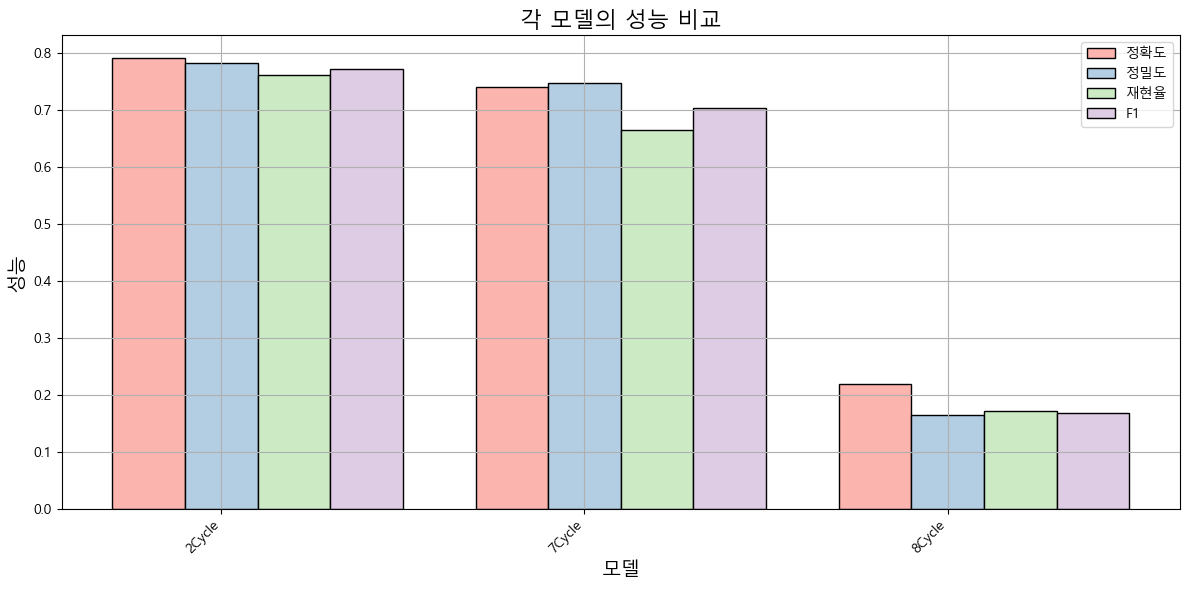

,model,정확도,정밀도,재현율,F1,AUC
0,2Cycle,0.7911,0.7817,0.7603,0.7708,0.7890
1,7Cycle,0.7405,0.7462,0.6644,0.7029,0.7351
2,8Cycle,0.2184,0.1656,0.1712,0.1684,0.2150


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 프레임에서 각 모델명과 해당 지표들을 추출합니다.
models = Cycle7_8['model']
accuracy = Cycle7_8['정확도']
precision = Cycle7_8['정밀도']
recall = Cycle7_8['재현율']
f1 = Cycle7_8['F1']
AUC = Cycle7_8['AUC']

# 그래프를 그립니다.
bar_width = 0.2
index = np.arange(len(models))

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

plt.figure(figsize=(12, 6))

plt.bar(index, accuracy, color=cmap(np.array([0])), width=bar_width, label='정확도', edgecolor='black')
plt.bar(index + bar_width, precision, color=cmap(np.array([1])), width=bar_width, label='정밀도', edgecolor='black')
plt.bar(index + 2*bar_width, recall, color=cmap(np.array([2])), width=bar_width, label='재현율', edgecolor='black')
plt.bar(index + 3*bar_width, f1, color=cmap(np.array([3])), width=bar_width, label='F1', edgecolor='black')
# plt.bar(index + 4*bar_width, AUC, color=cmap(np.array([4])), width=bar_width, label='AUC', edgecolor='black')

plt.title('각 모델의 성능 비교', fontsize=16)
plt.xlabel('모델', fontsize=14)
plt.ylabel('성능', fontsize=14)
plt.xticks(index + bar_width, models, rotation=45, ha='right')
plt.legend()
plt.grid(True)

# # y축의 범위 지정
# plt.ylim(0.7, 0.8)

plt.tight_layout()
plt.show()

display(Cycle7_8)

#### 🚩 2Cycle 결과
- Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 🚩 7Cycle 결과
- PCA
**정확도: 0.7405, 정밀도: 0.7462, 재현율: 0.6644, F1:0.7029, AUC:0.7351**

#### 🚩 8Cycle 결과
- LDA
**정확도: 0.2184, 정밀도: 0.1656, 재현율: 0.1712, F1:0.1684, AUC:0.2150**

#### 💡 분석
- 차원축소 진행 후 성능이 많이 하락한 것을 확인할 수 있음.
- 상관관계, 다중 공산성 등을 확인하여 전처리 진행 후 성능 평가를 진행하고자 함.